<a href="https://colab.research.google.com/github/ryan-avancena/Machine-Learning/blob/main/Linear_Regression_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [ ]:
# "Ten baseline variables, age, sex, body mass index, average blood pressure,
# and six blood serum measurements were obtained for each of n = 442 diabetes patients,
# as well as the response of interest, a quantitative measure of disease progression one year after baseline."

# In other words, our target variable  represents how much a person's diabetes has gotten better or worse one year after their initial measurement.
# This value is a number that tells us the level of change in the condition of the patient's diabetes. The higher the number, the more significant the progression of the disease.
diabetes = load_diabetes()

print(diabetes.DESCR)

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

diabetes_df['target'] = diabetes.target

diabetes_df.head()

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
# Splitting data for Training and Testing
X = diabetes_df.drop('target',axis=1)
y = diabetes_df['target']

X.shape, y.shape

((442, 10), (442,))

In [ ]:
from sklearn.model_selection import train_test_split

# usually, training and testing is an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# shapes of training and testing splits
print("Training set shape: ", X_train.shape, y_train.shape)
print("Testing set shape: ", X_test.shape, y_test.shape)

Training set shape:  (353, 10) (353,)
Testing set shape:  (89, 10) (89,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Creating our linear regression model
lr = LinearRegression()

# Training our model (how our model learns)
lr.fit(X_train, y_train)

# Predict on testing set
# Y_preds are predicted values of target variable based on the features
# Once we have the predictions, we can compare them to the actual value of target variable
# We do this to evaluate the performance of our model.
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = lr.intercept_

# R2 is the variance of the dependent variable (target) dependent on the independent variables
# Basically: How well the model fits the data! Higher is better (0-1). Ideally any value > 0.5 is pretty good.
print("R2 Score", r2)

# MSE: Average Squared distance between the predicted and actual vales. Lower is better.
print("Mean Squared Error", mse)

# MAE: Average Absolute distance between the predicted and actual values. Lower is better.
print("Mean Absolute Error: ", mae)

# Intercept: Starting point of regression line on the y-axis.
# Value of target when the features are 0.
print("Intercept: ", intercept)

R2 Score 0.4526027629719195
Mean Squared Error 2900.193628493482
Mean Absolute Error:  42.79409467959994
Intercept:  151.34560453985995


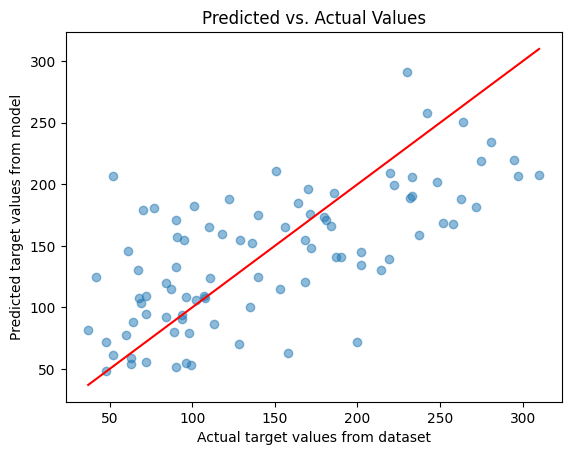

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted vs. actual values
# Predicted values of the target variable are plotted on the x-axis
# Actual values of the target variables are plotted on the y-axis

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.xlabel("Actual target values from dataset")
plt.ylabel("Predicted target values from model")
plt.title("Predicted vs. Actual Values")
plt.show()

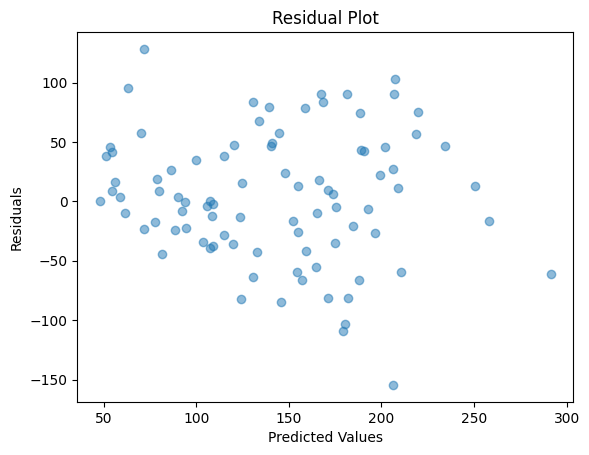

In [ ]:
# Plotting residuals

# The residuals are plotted against the predicted values of the target variables.
# If the linear regression model is a good fit for the data, the residual plot should show
# a random scatter of the points around zero with no discernable trend.

plt.scatter(y_pred, y_test-y_pred, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Inserting a data and getting a value
new_sample = np.array([[0.03807591, 0.05068012, 0.06169621, 0.02187235, -0.0442235, -0.03482076, -0.04340085, -0.00259226, 0.01990749, -0.01764613]])

# Make a prediction using the trained model
predicted_value = lr.predict(new_sample)

print("Predicted value for the new sample:", predicted_value[0])

Predicted value for the new sample: 210.74208617869107


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
